<a href="https://colab.research.google.com/github/avigailnaveh/books/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **תרגיל 1**

In [61]:
import math

def Shortestlocation(my_location, restaurants):
    my_x, my_y = map(float, my_location.split(","))
    min_distance = float('inf')
    closest_restaurant = ""

    for name, cor in restaurants.items():
        res_x, res_y = map(float, cor.split(","))
        distance = math.sqrt((res_x - my_x) ** 2 + (res_y - my_y) ** 2)
        if min_distance > distance:
            min_distance = distance
            closest_restaurant = name

    print(f"המסעדה הקרובה ביותר היא {closest_restaurant} עם מרחק של {min_distance}")

my_location = "31.757463, 34.987072"
restaurants = {
    "KAPAO THAI FOOD": "31.755643, 34.986543",
    "משולשים": "31.755827, 34.987000",
    "110 בורגר": "31.755827, 34.987649",
    "בליקר בייקרי": "31.755827, 34.988106",
    "רובן": "31.756931, 34.986688"
}

Shortestlocation(my_location, restaurants)


המסעדה הקרובה ביותר היא רובן עם מרחק של 0.0006561097469153356


# **תרגיל 2**

Solutions for sin(x) = cos(x): [0.7853981633974483, 3.9269908169872414]
Solutions for sin(x) = tan(x): [0.0]
Solutions for x^2 - 5x + 25 = 10x + 8: [1.235017956929125, 13.764982043070876]
Solutions for x^3 - 5x + 25 = 0: [-3.488142531393908]


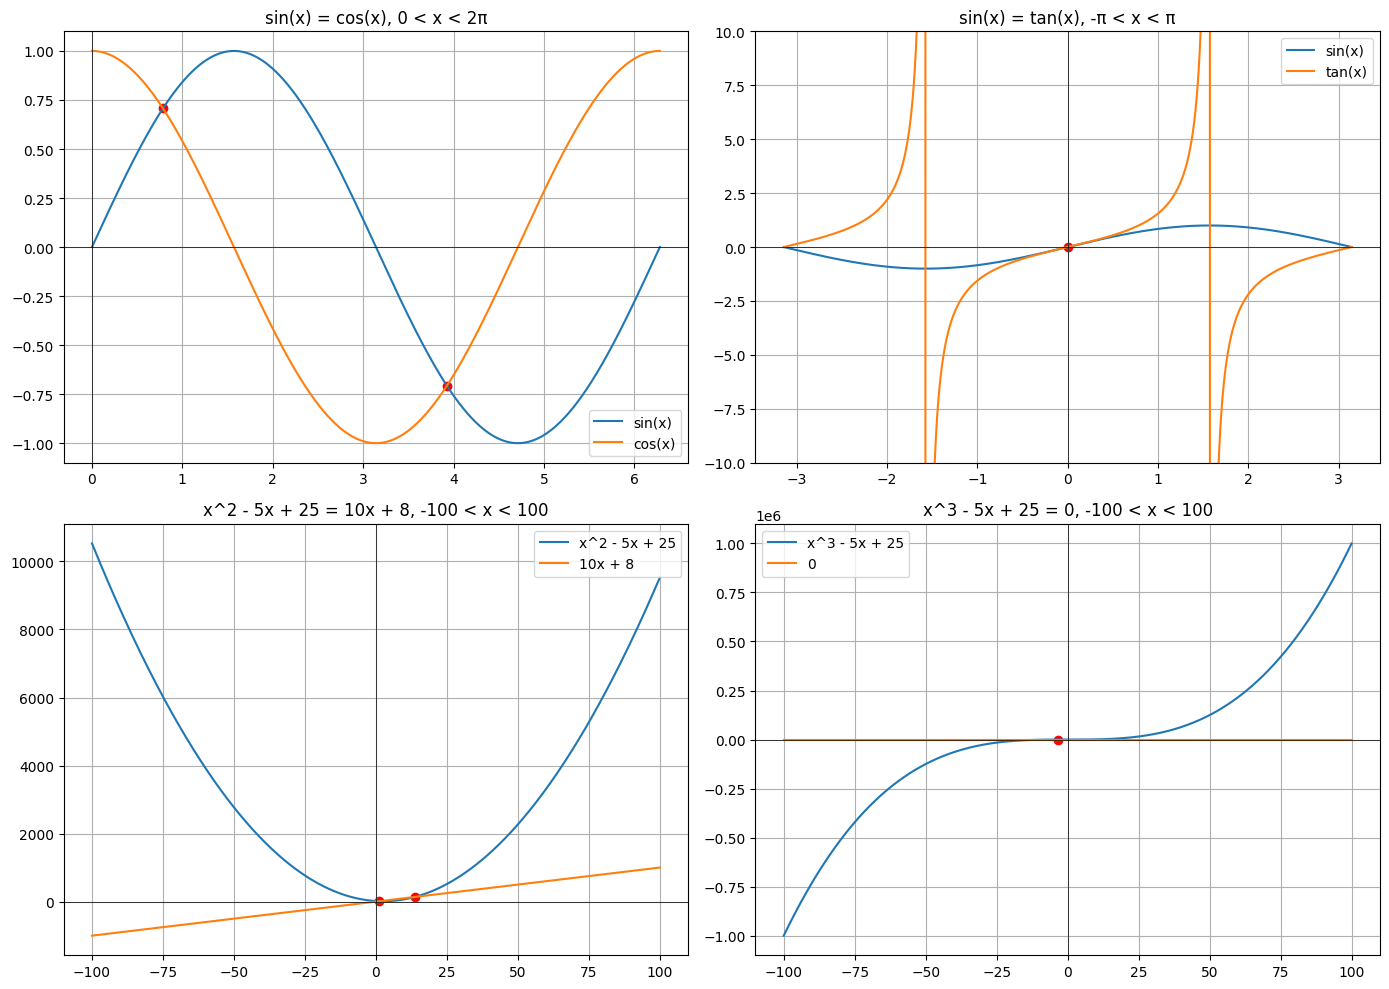

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Define the functions for each equation
def eq1(x):
    return np.sin(x) - np.cos(x)

def eq2(x):
    return np.sin(x) - np.tan(x)

def eq3(x):
    return x**2 - 5*x + 25 - (10*x + 8)

def eq4(x):
    return x**3 - 5*x + 25

# Function to find multiple roots in a range using root_scalar
def find_roots(func, x_range, method='brentq', step=0.1):
    roots = []
    x_vals = np.arange(x_range[0], x_range[1], step)
    for i in range(len(x_vals) - 1):
        try:
            root_result = root_scalar(func, bracket=[x_vals[i], x_vals[i+1]], method=method)
            if root_result.converged:
                root = root_result.root
                if not any(np.isclose(root, r, atol=1e-5) for r in roots):
                    roots.append(root)
        except ValueError:
            pass  # No root in this interval
    return roots

# Find the solutions using root_scalar in specified ranges
solutions_eq1 = find_roots(eq1, [0, 2*np.pi])
solutions_eq2 = find_roots(eq2, [-0.1, 0.1])
solutions_eq3 = find_roots(eq3, [-100, 100])
solutions_eq4 = find_roots(eq4, [-100, 100])

# Display solutions
print("Solutions for sin(x) = cos(x):", solutions_eq1)
print("Solutions for sin(x) = tan(x):", solutions_eq2)
print("Solutions for x^2 - 5x + 25 = 10x + 8:", solutions_eq3)
print("Solutions for x^3 - 5x + 25 = 0:", solutions_eq4)

# Plotting the functions
x1 = np.linspace(0, 2*np.pi, 1000)
x2 = np.linspace(-np.pi, np.pi, 1000)
x3 = np.linspace(-100, 100, 1000)
x4 = np.linspace(-100, 100, 1000)


y1_1 = np.sin(x1)
y1_2 = np.cos(x1)

y2_1 = np.sin(x2)
y2_2 = np.tan(x2)

y3_1 = x3**2 - 5*x3 + 25
y3_2 = 10*x3 + 8

y4 = x4**3 - 5*x4 + 25
y5 = np.zeros_like(x4)
plt.figure(figsize=(14, 10))

# sin(x) = cos(x)
plt.subplot(2, 2, 1)
plt.plot(x1, y1_1, label="sin(x)")
plt.plot(x1, y1_2, label="cos(x)")
plt.scatter(solutions_eq1, np.sin(solutions_eq1), color='red')  # Plot solutions
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('sin(x) = cos(x), 0 < x < 2π')
plt.legend()
plt.grid(True)

# sin(x) = tan(x)
plt.subplot(2, 2, 2)
plt.plot(x2, y2_1, label="sin(x)")
plt.plot(x2, y2_2, label="tan(x)")
plt.scatter(solutions_eq2, np.sin(solutions_eq2), color='red')  # Plot solutions
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-10, 10)  # Limiting the y-axis to make the plot clearer
plt.title('sin(x) = tan(x), -π < x < π')
plt.legend()
plt.grid(True)

# x^2 - 5x + 25 = 10x + 8
plt.subplot(2, 2, 3)
plt.plot(x3, y3_1, label="x^2 - 5x + 25")
plt.plot(x3, y3_2, label="10x + 8")
plt.scatter(solutions_eq3, [eq3(sol) + 10*sol + 8 for sol in solutions_eq3], color='red')  # Plot solutions
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('x^2 - 5x + 25 = 10x + 8, -100 < x < 100')
plt.legend()
plt.grid(True)

# x^3 - 5x + 25 = 0
plt.subplot(2, 2, 4)
plt.plot(x4, y4, label="x^3 - 5x + 25")
plt.plot(x4, y5, label="0")
plt.scatter(solutions_eq4, [0]*len(solutions_eq4), color='red')  # Plot solutions
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('x^3 - 5x + 25 = 0, -100 < x < 100')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
